In [1]:
import pandas as pd

df = pd.read_csv("applicants_with_demographics.csv")

print(df.shape)          # Zeilen, Spalten
print(df.dtypes)         # Datentypen
print(df.head())         # erste 5 Zeilen
print(df.describe())     # numerische Statistik

(1000, 15)
Resume_ID                  int64
Name                      object
Skills                    object
Experience (Years)         int64
Education                 object
Certifications            object
Job Role                  object
Recruiter Decision        object
Salary Expectation ($)     int64
Projects Count             int64
AI Score (0-100)           int64
Skills_list               object
Hire_binary                int64
gender                    object
ethnicity                 object
dtype: object
   Resume_ID              Name                                        Skills  \
0          1        Ashley Ali                      TensorFlow, NLP, Pytorch   
1          2      Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
2          3     Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
3          4  Elizabeth Carney                   Python, Pytorch, TensorFlow   
4          5        Julie Hill                              SQL, React, Java   


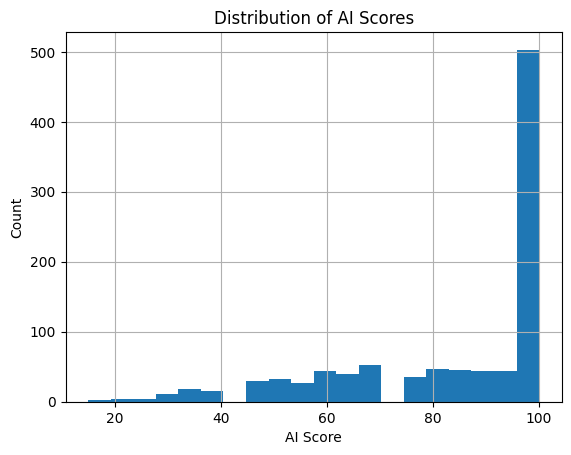

In [2]:
import matplotlib.pyplot as plt

df["AI Score (0-100)"].hist(bins=20)
plt.xlabel("AI Score")
plt.ylabel("Count")
plt.title("Distribution of AI Scores")
plt.show()


In [3]:
df.groupby("Job Role")["AI Score (0-100)"].mean().sort_values()


Job Role
Cybersecurity Analyst    82.960784
Data Scientist           83.843137
AI Researcher            84.085603
Software Engineer        85.000000
Name: AI Score (0-100), dtype: float64

In [4]:
df.groupby("Education")["Salary Expectation ($)"].mean().sort_values()


Education
MBA       78889.128713
PhD       79311.102564
B.Sc      79959.356098
M.Tech    80487.974747
B.Tech    81324.650000
Name: Salary Expectation ($), dtype: float64

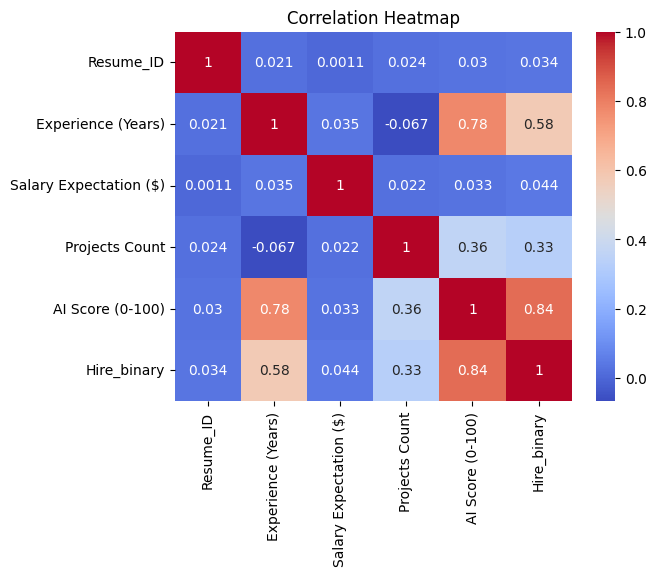

In [5]:
numeric = df.select_dtypes(include=["int64","float64"])
corr = numeric.corr()

import seaborn as sns
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


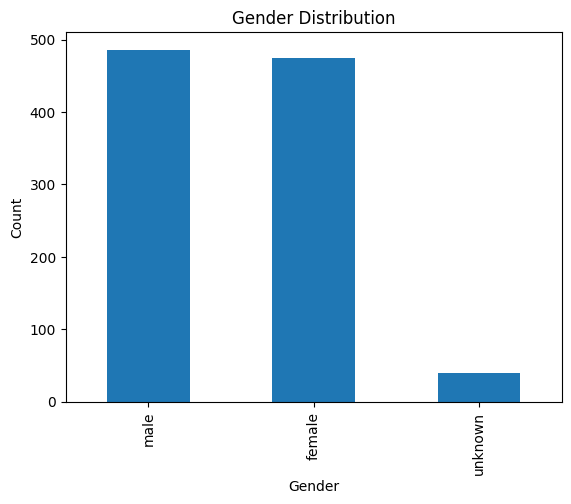

In [6]:
df["gender"].value_counts().plot(kind="bar", title="Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


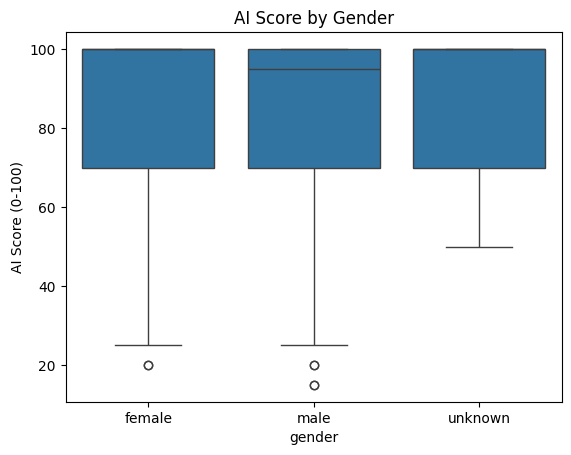

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,474.0,84.303797,20.933311,20.0,70.0,100.0,100.0,100.0
male,486.0,83.333333,21.300501,15.0,70.0,95.0,100.0,100.0
unknown,40.0,87.250000,17.429345,50.0,70.0,100.0,100.0,100.0


In [7]:
import seaborn as sns

sns.boxplot(x="gender", y="AI Score (0-100)", data=df)
plt.title("AI Score by Gender")
plt.show()

df.groupby("gender")["AI Score (0-100)"].describe()


Recruiter Decision  Hire  Reject
gender                          
female               386      88
male                 391      95
unknown               35       5


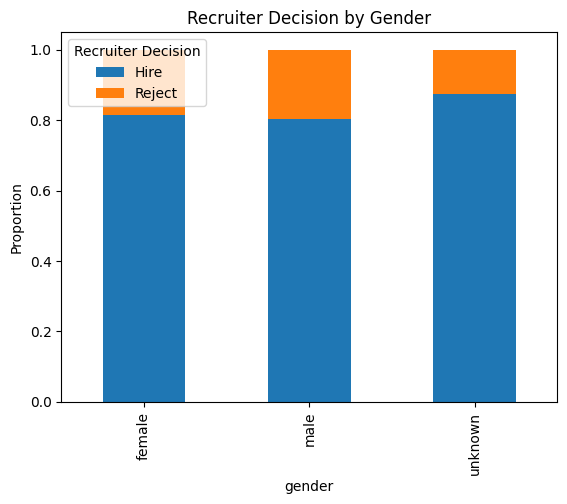

In [8]:
ct = pd.crosstab(df["gender"], df["Recruiter Decision"])
print(ct)

ct.div(ct.sum(1), axis=0).plot(kind="bar", stacked=True)
plt.title("Recruiter Decision by Gender")
plt.ylabel("Proportion")
plt.show()


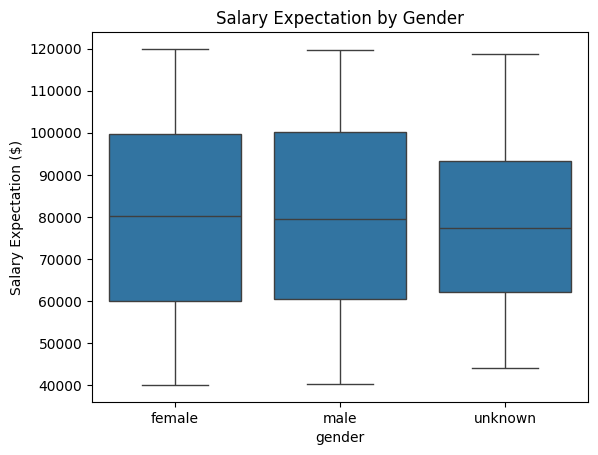

In [9]:
sns.boxplot(x="gender", y="Salary Expectation ($)", data=df)
plt.title("Salary Expectation by Gender")
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Encode gender
df["gender_enc"] = LabelEncoder().fit_transform(df["gender"].astype(str))

# Features + target
X = df[["Experience (Years)", "Salary Expectation ($)", 
        "Projects Count", "AI Score (0-100)", "gender_enc"]]
y = df["Hire_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


Accuracy: 1.0
AI Score (0-100)          0.731053
Experience (Years)        0.177353
Projects Count            0.074387
Salary Expectation ($)    0.015783
gender_enc                0.001424
dtype: float64


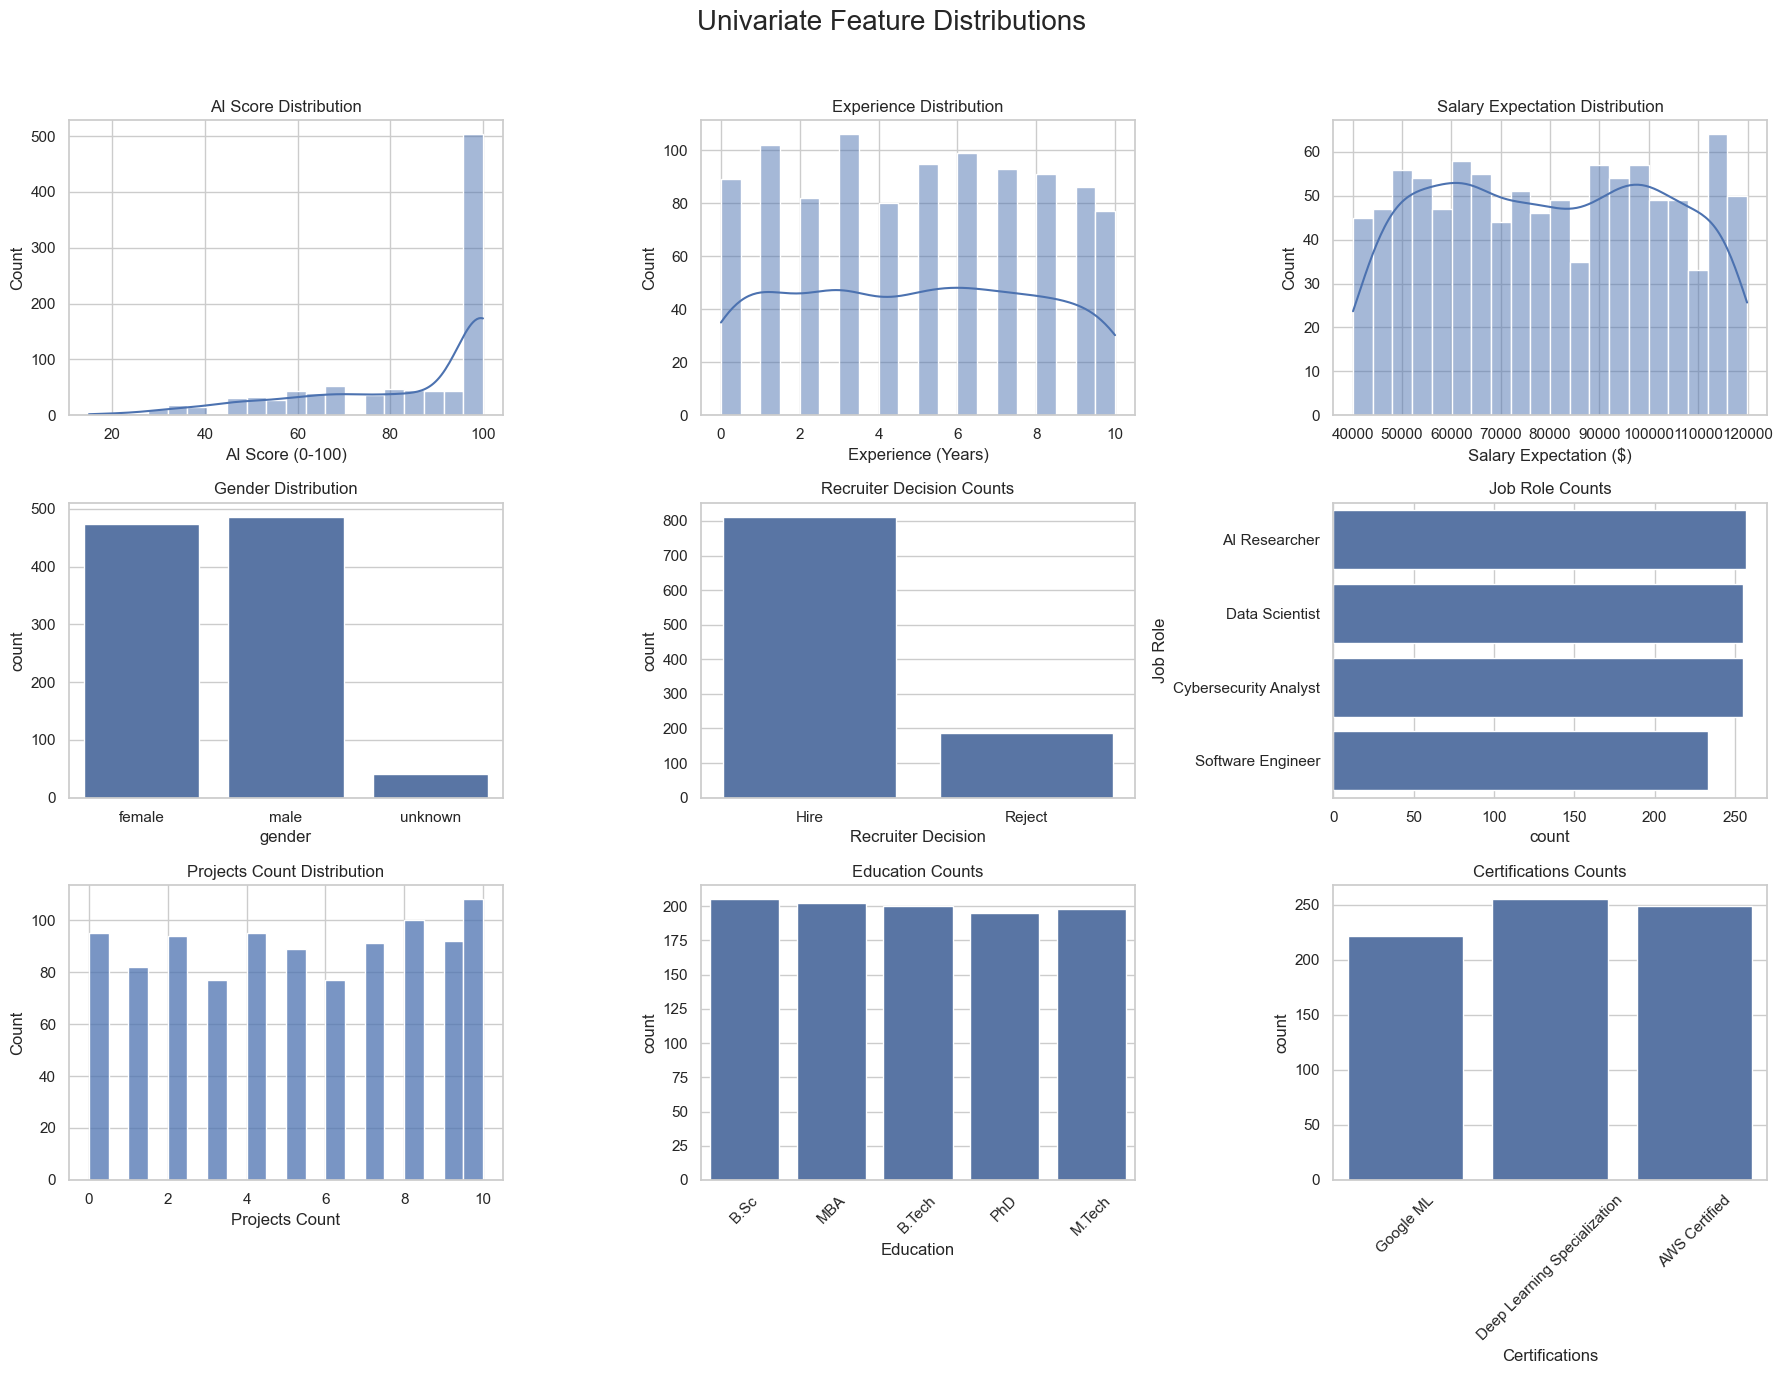

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")

# ------------------------
# 1) Univariate analysis
# ------------------------
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle("Univariate Feature Distributions", fontsize=20)

# Numeric distributions
sns.histplot(df["AI Score (0-100)"], bins=20, kde=True, ax=axes[0,0])
axes[0,0].set_title("AI Score Distribution")

sns.histplot(df["Experience (Years)"], bins=20, kde=True, ax=axes[0,1])
axes[0,1].set_title("Experience Distribution")

sns.histplot(df["Salary Expectation ($)"], bins=20, kde=True, ax=axes[0,2])
axes[0,2].set_title("Salary Expectation Distribution")

# Categorical counts
sns.countplot(x="gender", data=df, ax=axes[1,0])
axes[1,0].set_title("Gender Distribution")

sns.countplot(x="Recruiter Decision", data=df, ax=axes[1,1])
axes[1,1].set_title("Recruiter Decision Counts")

sns.countplot(y="Job Role", data=df, order=df["Job Role"].value_counts().index, ax=axes[1,2])
axes[1,2].set_title("Job Role Counts")

# More numeric features
sns.histplot(df["Projects Count"], bins=20, kde=False, ax=axes[2,0])
axes[2,0].set_title("Projects Count Distribution")

sns.countplot(x="Education", data=df, ax=axes[2,1])
axes[2,1].set_title("Education Counts")
axes[2,1].tick_params(axis="x", rotation=45)

sns.countplot(x="Certifications", data=df, ax=axes[2,2])
axes[2,2].set_title("Certifications Counts")
axes[2,2].tick_params(axis="x", rotation=45)

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

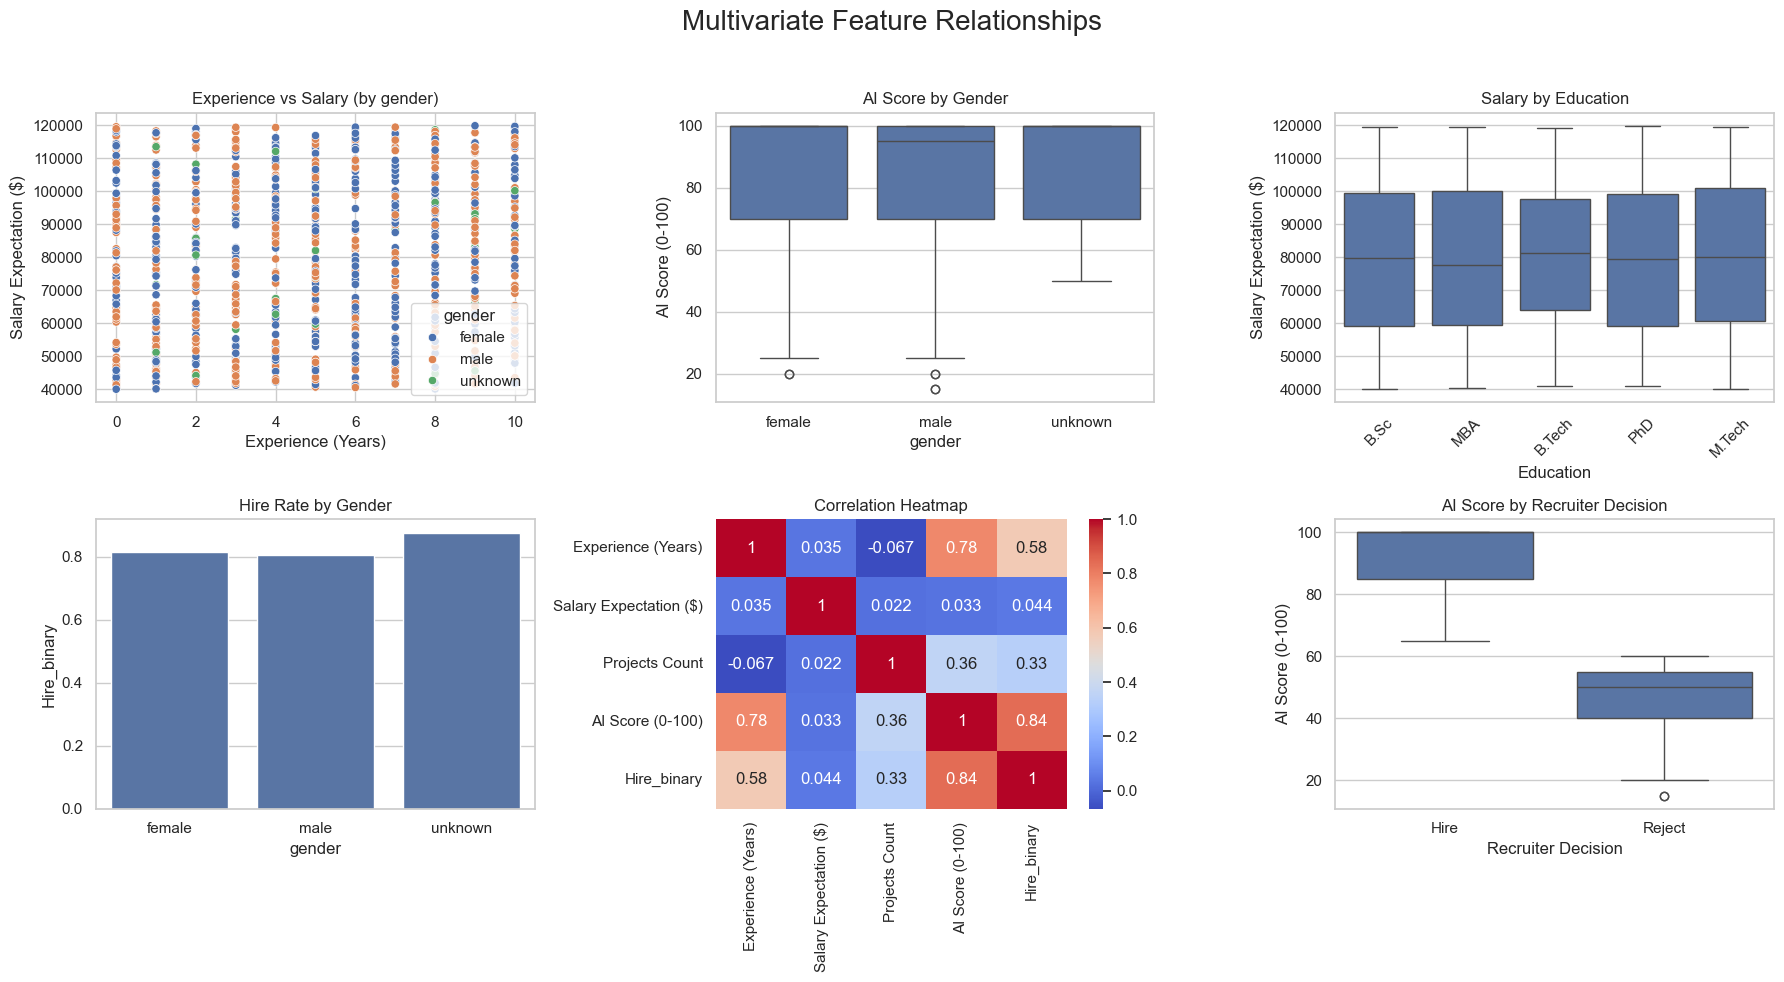

In [12]:
# ------------------------
# 2) Multivariate analysis
# ------------------------
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Multivariate Feature Relationships", fontsize=20)

# Scatter: Experience vs Salary
sns.scatterplot(x="Experience (Years)", y="Salary Expectation ($)", hue="gender", data=df, ax=axes[0,0])
axes[0,0].set_title("Experience vs Salary (by gender)")

# Box: AI Score by Gender
sns.boxplot(x="gender", y="AI Score (0-100)", data=df, ax=axes[0,1])
axes[0,1].set_title("AI Score by Gender")

# Box: Salary by Education
sns.boxplot(x="Education", y="Salary Expectation ($)", data=df, ax=axes[0,2])
axes[0,2].set_title("Salary by Education")
axes[0,2].tick_params(axis="x", rotation=45)

# Bar: Hire rate by Gender
hire_rate = df.groupby("gender")["Hire_binary"].mean().reset_index()
sns.barplot(x="gender", y="Hire_binary", data=hire_rate, ax=axes[1,0])
axes[1,0].set_title("Hire Rate by Gender")

# Correlation heatmap
corr = df[["Experience (Years)", "Salary Expectation ($)", "Projects Count", "AI Score (0-100)", "Hire_binary"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=axes[1,1])
axes[1,1].set_title("Correlation Heatmap")

# Box: AI Score by Recruiter Decision
sns.boxplot(x="Recruiter Decision", y="AI Score (0-100)", data=df, ax=axes[1,2])
axes[1,2].set_title("AI Score by Recruiter Decision")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [13]:
import ast

# Convert stringified lists into real Python lists
df["Skills_list"] = df["Skills_list"].apply(ast.literal_eval)


In [14]:
skills_expanded = df.explode("Skills_list")
skills_expanded.rename(columns={"Skills_list": "Skill"}, inplace=True)


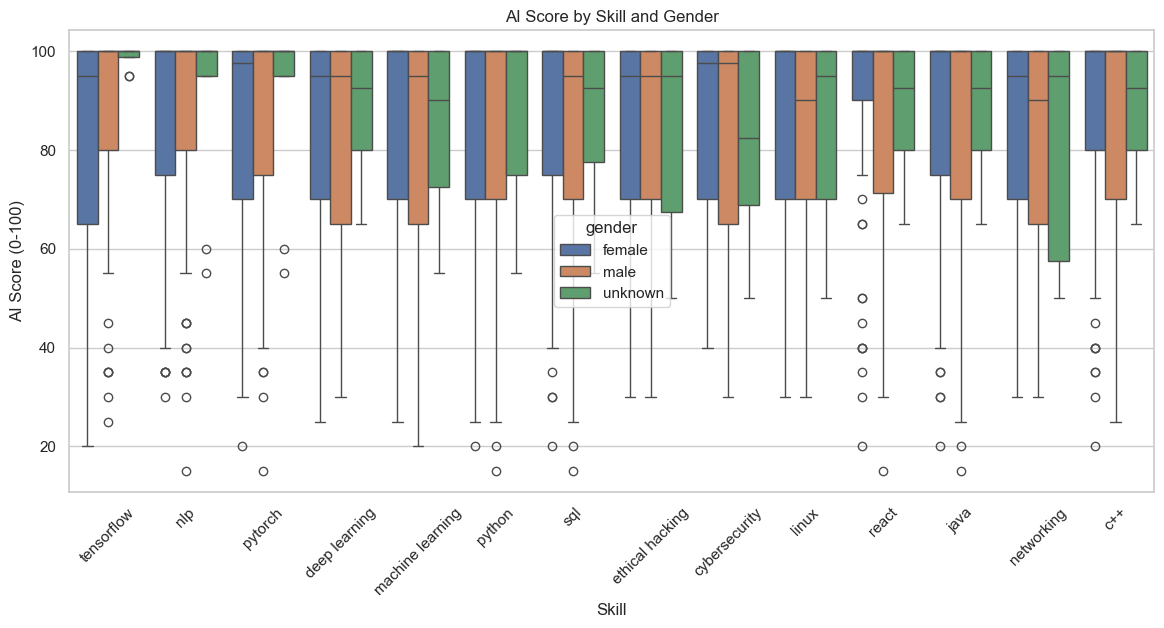

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(
    x="Skill",
    y="AI Score (0-100)",
    hue="gender",
    data=skills_expanded
)
plt.xticks(rotation=45)
plt.title("AI Score by Skill and Gender")
plt.show()


C:\Users\Mohadeseh Yousofy\AppData\Local\Temp\ipykernel_27864\800547356.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


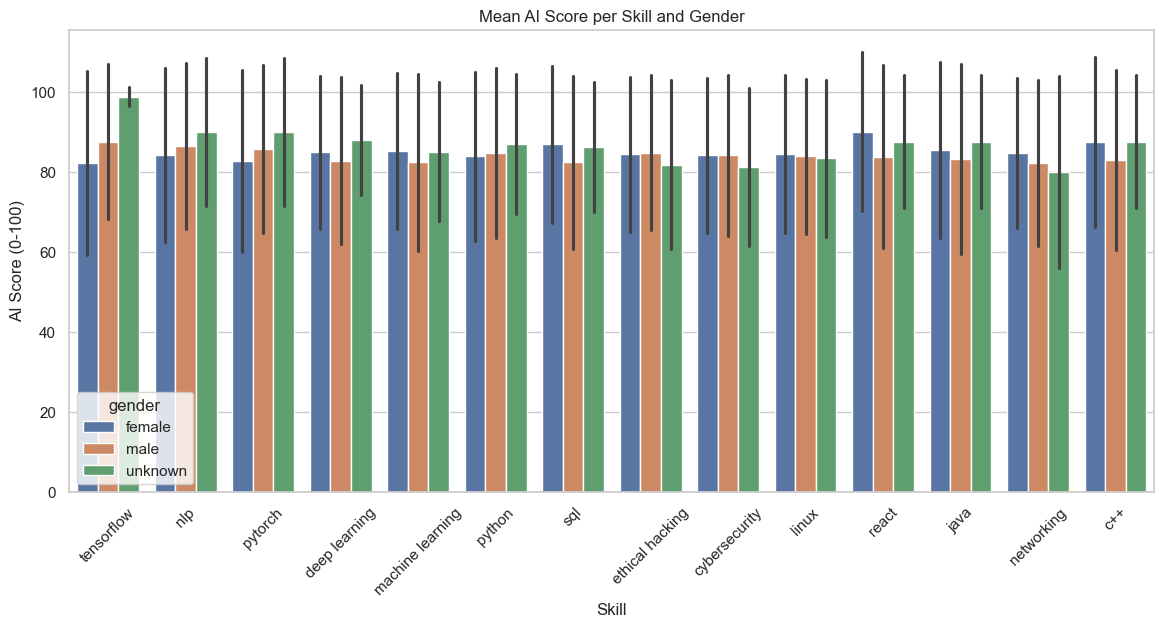

In [16]:
plt.figure(figsize=(14,6))
sns.barplot(
    x="Skill",
    y="AI Score (0-100)",
    hue="gender",
    data=skills_expanded,
    ci="sd"
)
plt.xticks(rotation=45)
plt.title("Mean AI Score per Skill and Gender")
plt.show()


In [17]:
pivot = skills_expanded.pivot_table(
    index="Skill",
    columns="gender",
    values="AI Score (0-100)",
    aggfunc="mean"
)
print(pivot.round(1))


gender            female  male  unknown
Skill                                  
c++                 87.4  82.9     87.5
cybersecurity       84.1  84.1     81.2
deep learning       84.9  82.8     88.0
ethical hacking     84.4  84.8     81.8
java                85.5  83.3     87.5
linux               84.5  83.9     83.3
machine learning    85.3  82.4     85.0
networking          84.7  82.2     80.0
nlp                 84.3  86.4     90.0
python              83.9  84.8     86.8
pytorch             82.7  85.7     90.0
react               90.1  83.8     87.5
sql                 86.9  82.4     86.2
tensorflow          82.2  87.6     98.8


Sample normalized skills & counts:
               Name                                     skills_norm  \
0        Ashley Ali                      [tensorflow, nlp, pytorch]   
1      Wesley Roman  [deep learning, machine learning, python, sql]   
2     Corey Sanchez         [ethical hacking, cybersecurity, linux]   
3  Elizabeth Carney                   [python, pytorch, tensorflow]   
4        Julie Hill                              [sql, react, java]   

   num_skills  
0           3  
1           4  
2           3  
3           3  
4           3  


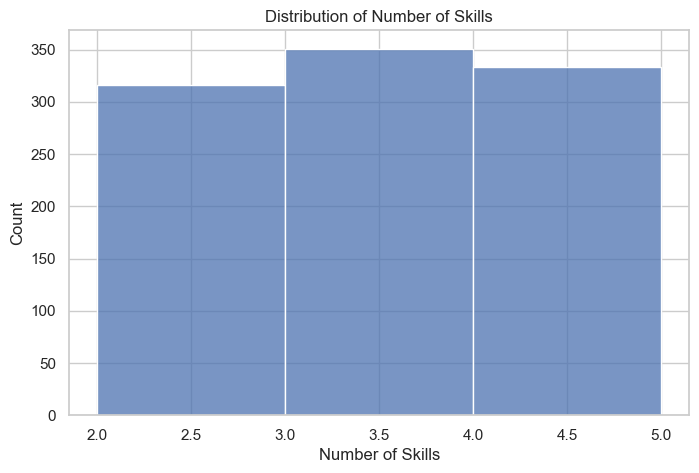

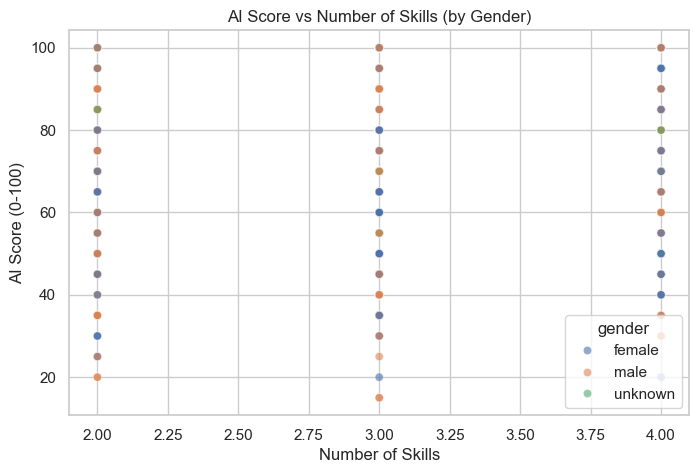

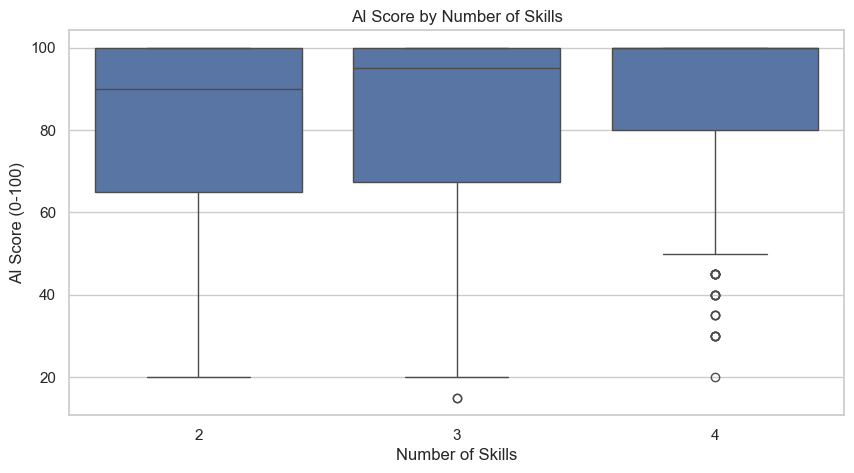

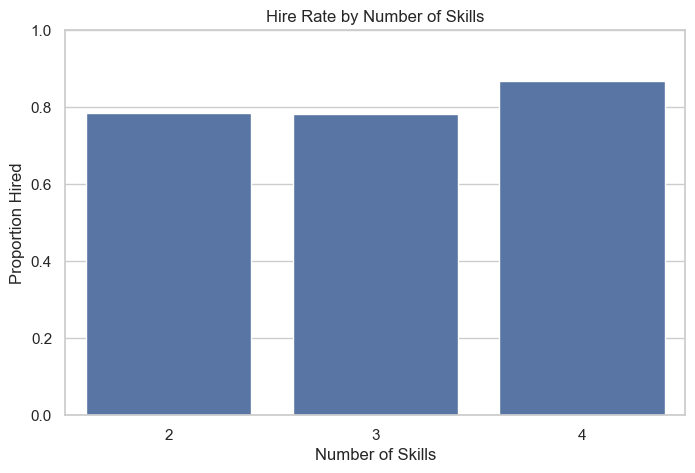

C:\Users\Mohadeseh Yousofy\AppData\Local\Temp\ipykernel_27864\546877450.py:102: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="num_skills", y="Hire_binary", hue="gender", data=df, ci=None)


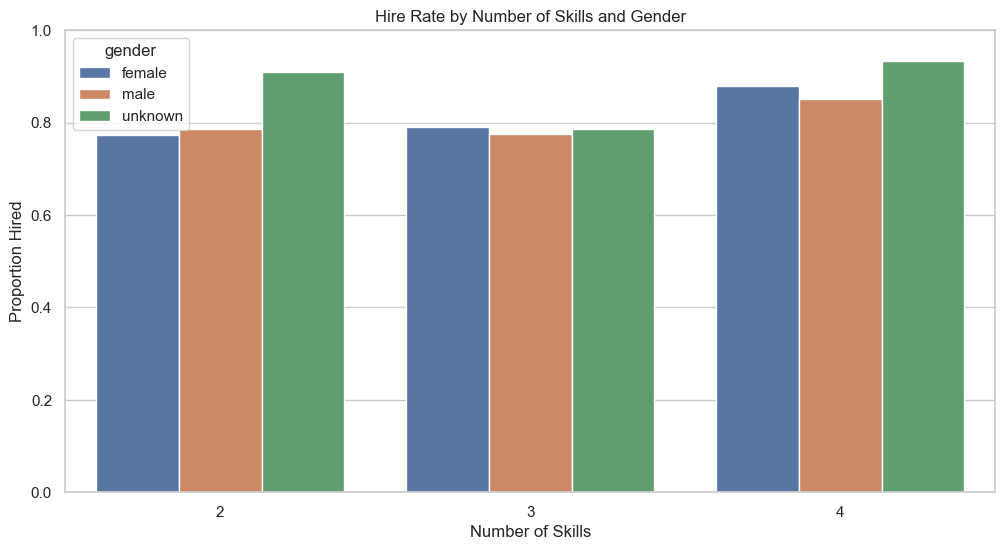


Summary by gender & num_skills (means):
    gender  num_skills  mean_ai_score  hire_rate
0   female           2      80.957447   0.773050
1   female           3      83.664773   0.789773
2   female           4      88.025478   0.878981
3     male           2      81.067073   0.786585
4     male           3      81.490683   0.776398
5     male           4      87.484472   0.850932
6  unknown           2      93.181818   0.909091
7  unknown           3      83.928571   0.785714
8  unknown           4      86.000000   0.933333


In [18]:
# ------- Robust skills normalization + feature engineering -------
import pandas as pd
import numpy as np
import json, ast, re
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Choose a source column: prefer Skills_list if present, else fall back to Skills
source_col = "Skills_list" if "Skills_list" in df.columns else "Skills"
tmp = df[source_col].copy()

def normalize_skills_cell(x):
    """
    Return a clean list of lowercase skill strings regardless of original format:
    - already a list -> normalize
    - JSON-like or Python-list-like string -> parse
    - comma-separated string -> split
    - NaN/None -> []
    """
    if isinstance(x, list) or isinstance(x, tuple):
        return [str(s).strip().lower() for s in x if str(s).strip()]
    if pd.isna(x):
        return []
    if isinstance(x, str):
        s = x.strip()
        # If it looks like a list: try JSON first, then literal_eval
        if s.startswith("[") and s.endswith("]"):
            # First attempt: json.loads with single->double quote swap as fallback
            try:
                return [str(v).strip().lower() for v in json.loads(s)]
            except Exception:
                try:
                    return [str(v).strip().lower() for v in json.loads(s.replace("'", '"'))]
                except Exception:
                    try:
                        return [str(v).strip().lower() for v in ast.literal_eval(s)]
                    except Exception:
                        pass  # fall through to comma split
        # Fallback: comma-separated
        return [part.strip().lower() for part in s.split(",") if part.strip()]
    # Any other type -> stringify
    return [str(x).strip().lower()]

# If some rows in source_col are empty, optionally try to supplement from 'Skills' if it exists
if source_col != "Skills" and "Skills" in df.columns:
    # Combine: if Skills_list row results empty after normalization, try Skills as backup
    norm_primary = df[source_col].apply(normalize_skills_cell)
    norm_backup  = df["Skills"].apply(normalize_skills_cell)
    skills_norm = [
        p if len(p)>0 else b
        for p, b in zip(norm_primary, norm_backup)
    ]
    df["skills_norm"] = skills_norm
else:
    df["skills_norm"] = df[source_col].apply(normalize_skills_cell)

# Create count
df["num_skills"] = df["skills_norm"].apply(len)

print("Sample normalized skills & counts:")
print(df[["Name","skills_norm","num_skills"]].head(5))

# ------- Analyses: num_skills x gender x AI Score x final decision -------
sns.set(style="whitegrid")

# 2) Distribution of number of skills
plt.figure(figsize=(8,5))
sns.histplot(df["num_skills"], bins=range(df["num_skills"].min(), df["num_skills"].max()+2), kde=False)
plt.title("Distribution of Number of Skills")
plt.xlabel("Number of Skills")
plt.ylabel("Count")
plt.show()

# 3) AI Score vs num_skills (by gender)
plt.figure(figsize=(8,5))
sns.scatterplot(x="num_skills", y="AI Score (0-100)", hue="gender", data=df, alpha=0.6)
plt.title("AI Score vs Number of Skills (by Gender)")
plt.xlabel("Number of Skills")
plt.ylabel("AI Score (0-100)")
plt.show()

# 4) AI Score by discrete num_skills
plt.figure(figsize=(10,5))
sns.boxplot(x="num_skills", y="AI Score (0-100)", data=df)
plt.title("AI Score by Number of Skills")
plt.xlabel("Number of Skills")
plt.ylabel("AI Score (0-100)")
plt.show()

# 5) Hire rate by num_skills (overall)
plt.figure(figsize=(8,5))
hire_rate_by_count = df.groupby("num_skills")["Hire_binary"].mean().reset_index()
sns.barplot(x="num_skills", y="Hire_binary", data=hire_rate_by_count)
plt.title("Hire Rate by Number of Skills")
plt.xlabel("Number of Skills")
plt.ylabel("Proportion Hired")
plt.ylim(0,1)
plt.show()

# 6) Hire rate by num_skills and gender
plt.figure(figsize=(12,6))
sns.barplot(x="num_skills", y="Hire_binary", hue="gender", data=df, ci=None)
plt.title("Hire Rate by Number of Skills and Gender")
plt.xlabel("Number of Skills")
plt.ylabel("Proportion Hired")
plt.ylim(0,1)
plt.show()

# 7) Summary table: mean AI Score & hire rate by (gender, num_skills)
summary = (
    df.groupby(["gender","num_skills"])[["AI Score (0-100)","Hire_binary"]]
      .mean()
      .rename(columns={"AI Score (0-100)":"mean_ai_score","Hire_binary":"hire_rate"})
      .reset_index()
      .sort_values(["gender","num_skills"])
)
print("\nSummary by gender & num_skills (means):")
print(summary.head(20))


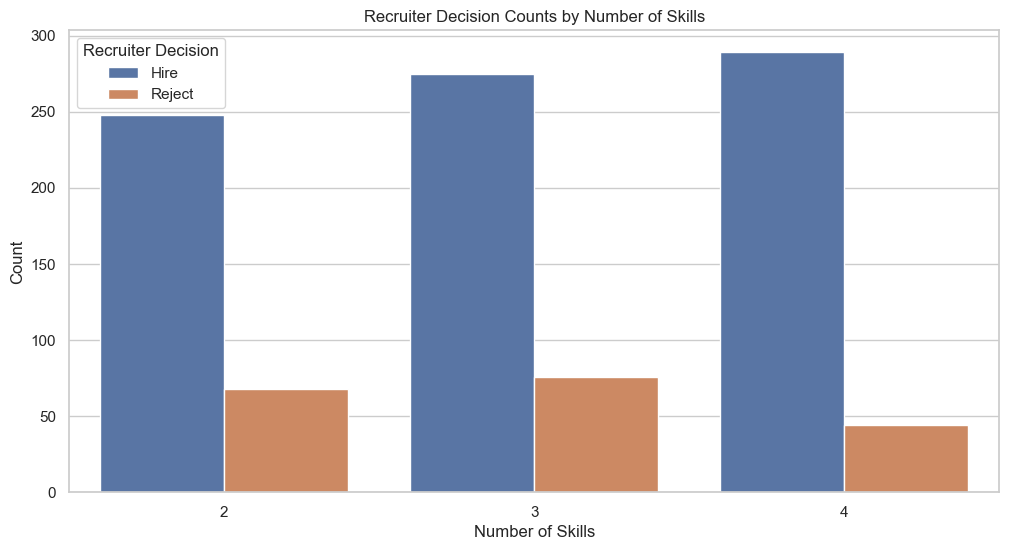

ValueError: cannot insert num_skills, already exists

<Figure size 1200x600 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1) Counts of decisions by num_skills
plt.figure(figsize=(12,6))
sns.countplot(
    x="num_skills",
    hue="Recruiter Decision",   # "Hire" or "Reject"
    data=df
)
plt.title("Recruiter Decision Counts by Number of Skills")
plt.xlabel("Number of Skills")
plt.ylabel("Count")
plt.show()

# 2) Proportion of Hire vs Reject by num_skills
plt.figure(figsize=(12,6))
decision_rate = (
    df.groupby(["num_skills","Recruiter Decision"])
      .size()
      .groupby(level=0).apply(lambda x: x/x.sum())
      .reset_index(name="proportion")
)
sns.barplot(
    x="num_skills", y="proportion",
    hue="Recruiter Decision",
    data=decision_rate
)
plt.title("Recruiter Decision Proportions by Number of Skills")
plt.xlabel("Number of Skills")
plt.ylabel("Proportion")
plt.ylim(0,1)
plt.show()

# 3) Cross-tab summary table
ct = pd.crosstab(df["num_skills"], df["Recruiter Decision"], normalize="index")
print("Proportion of Hire vs Reject by num_skills:")
print(ct.round(2))

# 4) Combined with gender
plt.figure(figsize=(14,6))
sns.barplot(
    x="num_skills", y="Hire_binary",
    hue="gender", data=df, ci=None
)
plt.title("Hire Rate by Number of Skills and Gender")
plt.xlabel("Number of Skills")
plt.ylabel("Proportion Hired")
plt.ylim(0,1)
plt.show()

# Summary table: gender x num_skills x decision counts
summary_counts = (
    df.groupby(["gender","num_skills","Recruiter Decision"])
      .size()
      .reset_index(name="count")
)
print("\nDecision counts by gender & num_skills:")
print(summary_counts.head(20))


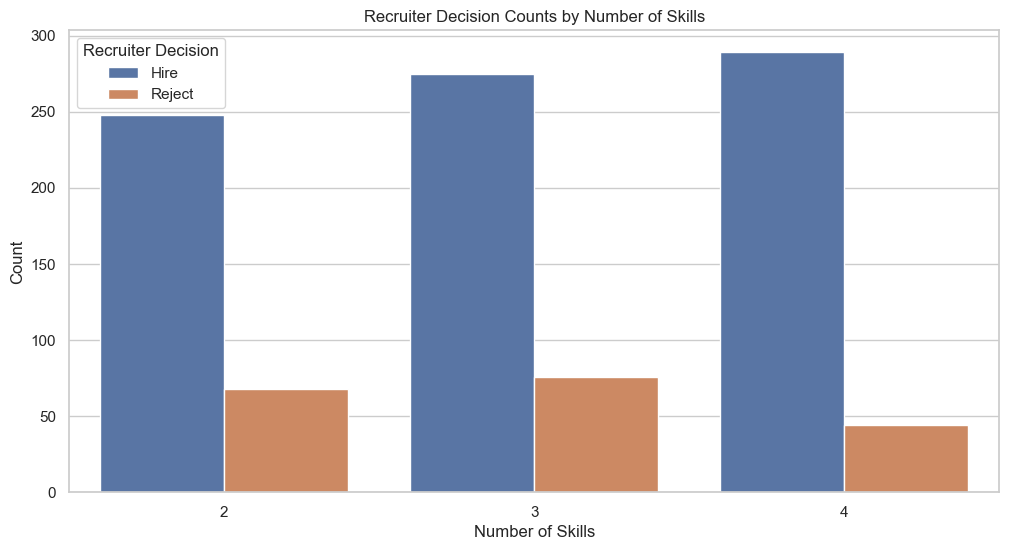

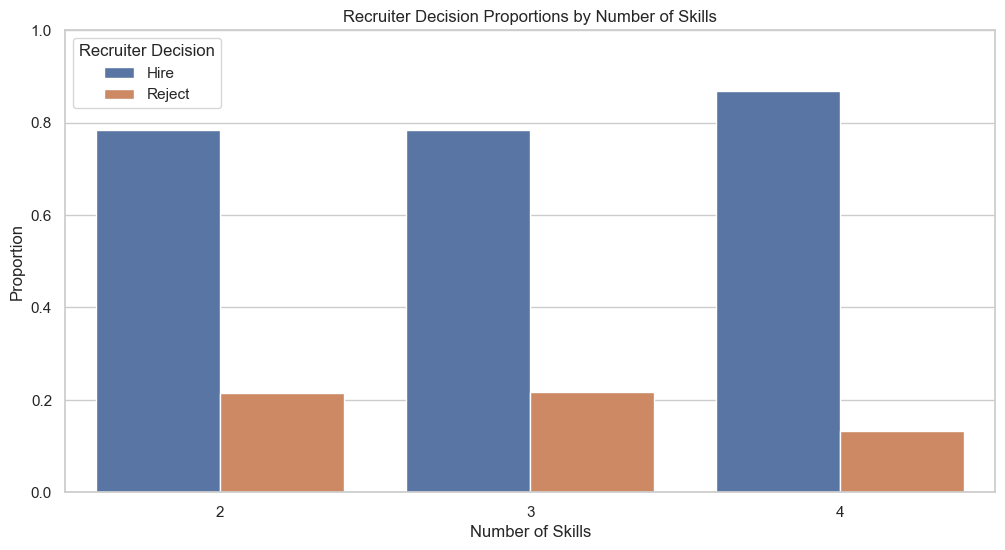

Proportion of Hire vs Reject by num_skills:
Recruiter Decision   Hire  Reject
num_skills                       
2                   0.785   0.215
3                   0.783   0.217
4                   0.868   0.132


C:\Users\Mohadeseh Yousofy\AppData\Local\Temp\ipykernel_27124\190684370.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


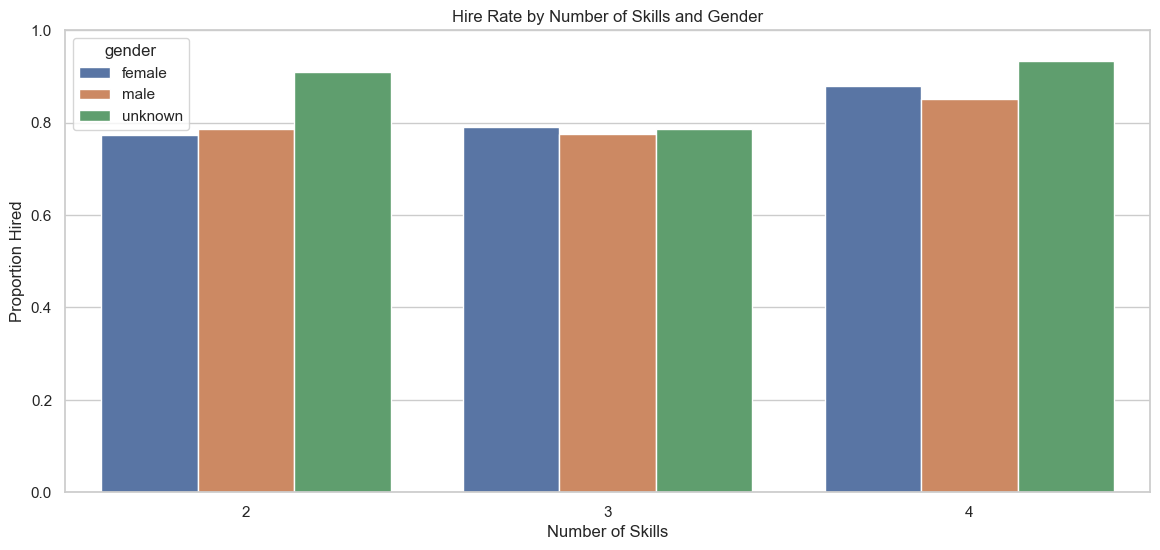


Decision counts by gender & num_skills:
     gender  num_skills Recruiter Decision  count
0    female           2               Hire    109
1    female           2             Reject     32
2    female           3               Hire    139
3    female           3             Reject     37
4    female           4               Hire    138
5    female           4             Reject     19
6      male           2               Hire    129
7      male           2             Reject     35
8      male           3               Hire    125
9      male           3             Reject     36
10     male           4               Hire    137
11     male           4             Reject     24
12  unknown           2               Hire     10
13  unknown           2             Reject      1
14  unknown           3               Hire     11
15  unknown           3             Reject      3
16  unknown           4               Hire     14
17  unknown           4             Reject      1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# --- 1) Counts of decisions by num_skills (this one is fine to keep) ---
plt.figure(figsize=(12,6))
sns.countplot(x="num_skills", hue="Recruiter Decision", data=df)
plt.title("Recruiter Decision Counts by Number of Skills")
plt.xlabel("Number of Skills")
plt.ylabel("Count")
plt.show()

# --- 2) Proportions (FIXED IMPLEMENTATION) ---
# Use crosstab normalized by index, then stack to long format
decision_rate = (
    pd.crosstab(df["num_skills"], df["Recruiter Decision"], normalize="index")
      .stack()
      .rename("proportion")
      .reset_index()
)
# Columns: ['num_skills', 'Recruiter Decision', 'proportion']

plt.figure(figsize=(12,6))
sns.barplot(
    x="num_skills", y="proportion",
    hue="Recruiter Decision",
    data=decision_rate
)
plt.title("Recruiter Decision Proportions by Number of Skills")
plt.xlabel("Number of Skills")
plt.ylabel("Proportion")
plt.ylim(0,1)
plt.show()

# --- 3) (Optional) Show the table used for plotting ---
print("Proportion of Hire vs Reject by num_skills:")
print(decision_rate.pivot(index="num_skills", columns="Recruiter Decision", values="proportion").round(3))

# --- 4) Hire rate by num_skills and gender (unchanged) ---
plt.figure(figsize=(14,6))
sns.barplot(
    x="num_skills", y="Hire_binary",
    hue="gender", data=df, ci=None
)
plt.title("Hire Rate by Number of Skills and Gender")
plt.xlabel("Number of Skills")
plt.ylabel("Proportion Hired")
plt.ylim(0,1)
plt.show()

# --- 5) Summary counts (gender × num_skills × decision) ---
summary_counts = (
    df.groupby(["gender","num_skills","Recruiter Decision"])
      .size()
      .reset_index(name="count")
)
print("\nDecision counts by gender & num_skills:")
print(summary_counts.head(20))


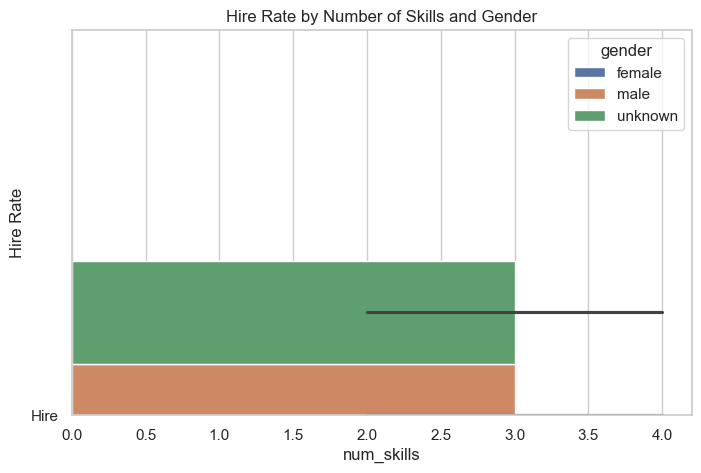

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

hire_rates = (
    summary_counts[summary_counts["Recruiter Decision"]=="Hire"]
      .reset_index(drop=True)
)

plt.figure(figsize=(8,5))
sns.barplot(x="num_skills", y="Recruiter Decision", hue="gender", data=hire_rates)
plt.ylim(0,1)
plt.ylabel("Hire Rate")
plt.title("Hire Rate by Number of Skills and Gender")
plt.show()


In [ ]:
import pandas as pd

# === Konfiguration ===
LOW_SCORE_THRESHOLD = 60        # Grenze für "niedrigen" AI Score
SELECTED_NUM_SKILLS = [4]       # Liste: [2], [3], [4], oder mehrere [2,3,4]
EXPERIENCE_YEARS = 5    # Mindestjahre Erfahrung
# ======================

# 1) Filter: niedrige Scores + gewünschte Anzahl Skills
low_score_df = df[
    #(df["AI Score (0-100)"] <= LOW_SCORE_THRESHOLD) &
    #(df["num_skills"].isin(SELECTED_NUM_SKILLS))
    (df["Experience (Years)"] <= EXPERIENCE_YEARS)
    & (df["Hire_binary"]==1)   # Nur tatsächlich eingestellte Kandidat:innen
].copy()

# 2) Gruppierung (optional, Übersicht)
grouped = (
    low_score_df.groupby(["gender","num_skills"])
                .size()
                .reset_index(name="count")
                .sort_values(["num_skills","gender"])
)

print("Übersicht der Gruppen:")
print(grouped)

# 3) End-Tabelle anzeigen
result = low_score_df[[
    "Name","gender","num_skills","Skills_list", "Job Role",
    "AI Score (0-100)","Recruiter Decision","Experience (Years)","Education"
]]

result.reset_index(drop=True, inplace=True)
result

# dieser codeblock macht folgendes:
# - filtert den datensatz nach kandidaten mit weniger als EXPERIENCE_YEARS erfahrung
# - gruppiert die gefilterten kandidaten nach geschlecht und anzahl der skills
# - zeigt eine tabelle mit name, geschlecht, anzahl skills, skills liste, job rolle, ai score, entscheidung, erfahrung und bildung der kandidaten an

#    Übersicht der Gruppen:
#        gender  num_skills  count
#    0   female           2     46
#    3     male           2     63
#    6  unknown           2      3
#    1   female           3     55
#    4     male           3     65
#    7  unknown           3      6
#    2   female           4     61
#    5     male           4     59
#    8  unknown           4      8

# der output zeigt die gruppenanzahl der gefilterten kandidaten nach geschlecht und anzahl der skills
# und zeigt in Bezug auf gender, dass Frauen mit 4 skills am häufigsten eingestellt wurden (61), gefolgt von Männern mit 3 skills (65) und Frauen mit 3 skills (55)
# unbekannte geschlechter sind in allen skill-gruppen sehr gering vertreten




Übersicht der Gruppen:
    gender  num_skills  count
0   female           2     46
3     male           2     63
6  unknown           2      3
1   female           3     55
4     male           3     65
7  unknown           3      6
2   female           4     61
5     male           4     59
8  unknown           4      8


,Name,gender,num_skills,Skills_list,Job Role,AI Score (0-100),Recruiter Decision,Experience (Years),Education
0,Corey Sanchez,unknown,3,"[ethical hacking, cybersecurity, linux]",Cybersecurity Analyst,70,Hire,1,MBA
1,Julie Hill,female,3,"[sql, react, java]",Software Engineer,100,Hire,4,PhD
2,Tony Smith,male,3,"[networking, cybersecurity, ethical hacking]",Cybersecurity Analyst,100,Hire,4,M.Tech
3,Anthony Harrison,male,3,"[tensorflow, pytorch, nlp]",AI Researcher,90,Hire,3,M.Tech
4,Laura French,female,3,"[sql, java, c++]",Software Engineer,70,Hire,1,PhD
...,...,...,...,...,...,...,...,...,...
361,Christina Ball,female,2,"[python, nlp]",AI Researcher,100,Hire,5,B.Sc
362,Jennifer Martinez,female,4,"[react, c++, java, sql]",Software Engineer,100,Hire,5,M.Tech
363,Jacob Davis,male,4,"[networking, ethical hacking, linux, cybersecu...",Cybersecurity Analyst,100,Hire,3,PhD
364,Brian Hawkins,male,2,"[react, java]",Software Engineer,90,Hire,4,PhD


In [ ]:
import pandas as pd

# === Konfiguration ===
MIN_EXP = 0
MAX_EXP = 5

EXP = 1    # Beispiel: gleiche Erfahrungsgruppe 0–5 Jahre
# ======================

# 1) Filter auf Erfahrung in gewünschter Range
subset = df[
#    (df["Experience (Years)"] >= MIN_EXP) &
#    (df["Experience (Years)"] <= MAX_EXP) &
    (df["Experience (Years)"] == EXP) &
    (df["gender"].isin(["female","male"])) &  # nur klare gender
    (df["Job Role"] == "Cybersecurity Analyst") &  # nur Data Scientists
    (df["num_skills"] == 4)   # nur 4 skills
].copy()

# 2) Übersicht nach gender
summary = (
    subset.groupby("gender")
          .agg(mean_ai_score=("AI Score (0-100)", "mean"),
               mean_num_skills=("num_skills", "mean"),
               hire_rate=("Hire_binary", "mean"),
               count=("Hire_binary", "size"))
          .reset_index()
)

print("Vergleich Männer vs Frauen bei gleicher Erfahrung:")
print(summary.round(2))

# 3) Optional: Crosstab für Hire vs Gender (innerhalb dieser Erfahrungsrange)
ct = pd.crosstab(subset["gender"], subset["Recruiter Decision"], normalize="index")
print("\nProportion Hire vs Reject innerhalb der Range:")
print(ct.round(2))

# 4) End-Tabelle anzeigen
result = subset[[
    "Name","gender","Experience (Years)","num_skills","Skills_list",
    "AI Score (0-100)","Recruiter Decision","Education","Job Role"
]].reset_index(drop=True)

result.head(20)   # Tabelle der ersten 20 Kandidaten


# Dieser Codeblock macht folgendes:
# - filtert den Datensatz nach Kandidaten mit einer Erfahrung EXP = 1
# - filtert den Datensatz nach Kandidaten mit einer Erfahrung zwischen MIN_EXP und MAX_EXP --- IGNORE ---
# - zeigt eine Übersicht der gefilterten Kandidaten nach Geschlecht mit durchschnittlichem AI Score, durchschnittlicher Anzahl Skills, Einstellungsrate und Gesamtanzahl
# - zeigt eine Kreuztabelle der Einstellungsproportionen nach Geschlecht innerhalb dieser

# Ergebnisse:
# Vergleich Männer vs Frauen bei gleicher Erfahrung:
# Vergleich Männer vs Frauen bei gleicher Erfahrung:
#   gender  mean_ai_score  mean_num_skills  hire_rate  count
#  0  female           58.9             3.02       0.40     50
#  1    male           60.2             3.02       0.51     49

# Proportion Hire vs Reject innerhalb der Range:
# Recruiter Decision  Hire  Reject
# gender                          
# female              0.40    0.60
# male                0.51    0.49

# Das zeigt, dass Männer in dieser Erfahrungsgruppe (1 Jahr) eine höhere Einstellungsrate (51%) haben als Frauen (40%), obwohl sie eine ähnliche durchschnittliche Anzahl an Skills (3.02) und einen leicht höheren durchschnittlichen AI Score (60.2 vs 58.9) aufweisen.
# Die Gesamtanzahl der Kandidaten in dieser Gruppe ist mit 50 Frauen und 49 Männern vergleichbar. Erfahrungsgruppe
# - zeigt eine Tabelle mit Name, Geschlecht, Erfahrung, Anzahl Skills, Skills Liste, AI Score, Entscheidung, Bildung und Job Rolle der Kandidaten an


Vergleich Männer vs Frauen bei gleicher Erfahrung:
   gender  mean_ai_score  mean_num_skills  hire_rate  count
0  female          61.25              4.0        0.5      4
1    male          78.33              4.0        1.0      3

Proportion Hire vs Reject innerhalb der Range:
Recruiter Decision  Hire  Reject
gender                          
female               0.5     0.5
male                 1.0     0.0


,Name,gender,Experience (Years),num_skills,Skills_list,AI Score (0-100),Recruiter Decision,Education,Job Role
0,April Flores,female,1,4,"[networking, cybersecurity, ethical hacking, l...",55,Reject,B.Sc,Cybersecurity Analyst
1,Derrick Mendoza,male,1,4,"[cybersecurity, ethical hacking, networking, l...",70,Hire,M.Tech,Cybersecurity Analyst
2,John James,male,1,4,"[linux, networking, cybersecurity, ethical hac...",80,Hire,B.Sc,Cybersecurity Analyst
3,Nancy Brown,female,1,4,"[ethical hacking, linux, cybersecurity, networ...",80,Hire,B.Tech,Cybersecurity Analyst
4,Thomas Hutchinson,male,1,4,"[ethical hacking, networking, linux, cybersecu...",85,Hire,B.Sc,Cybersecurity Analyst
5,Theresa Hansen,female,1,4,"[cybersecurity, networking, linux, ethical hac...",70,Hire,B.Sc,Cybersecurity Analyst
6,Tina Booth,female,1,4,"[cybersecurity, ethical hacking, linux, networ...",40,Reject,MBA,Cybersecurity Analyst


C:\Users\Mohadeseh Yousofy\AppData\Local\Temp\ipykernel_27124\2046661761.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


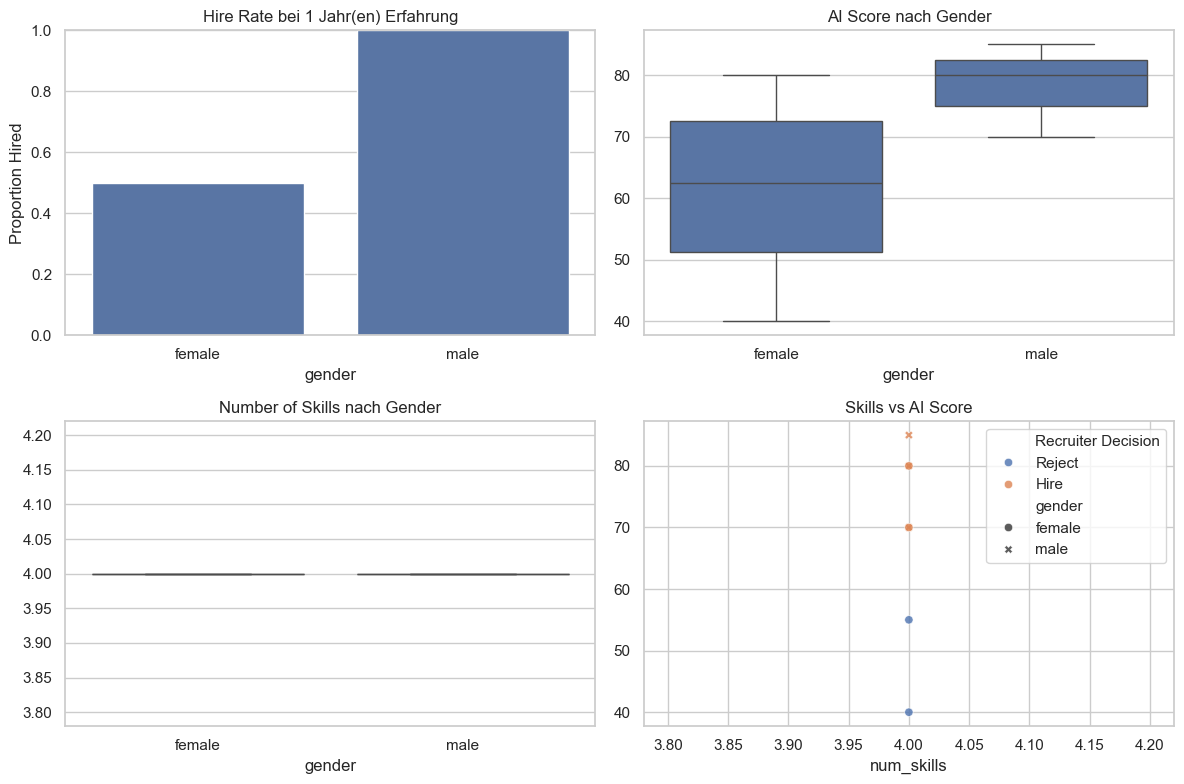

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12,8))  # 2x2 Grid

# 1) Hire Rate Barplot
sns.barplot(
    x="gender", y="Hire_binary",
    data=subset, ci=None, ax=axes[0,0]
)
axes[0,0].set_title(f"Hire Rate bei {EXP} Jahr(en) Erfahrung")
axes[0,0].set_ylim(0,1)
axes[0,0].set_ylabel("Proportion Hired")

# 2) AI Score Boxplot
sns.boxplot(
    x="gender", y="AI Score (0-100)", data=subset, ax=axes[0,1]
)
axes[0,1].set_title("AI Score nach Gender")
axes[0,1].set_ylabel("")

# 3) Number of Skills Boxplot
sns.boxplot(
    x="gender", y="num_skills", data=subset, ax=axes[1,0]
)
axes[1,0].set_title("Number of Skills nach Gender")
axes[1,0].set_ylabel("")

# 4) Scatter: Skills vs AI Score
sns.scatterplot(
    x="num_skills", y="AI Score (0-100)",
    hue="Recruiter Decision", style="gender",
    data=subset, alpha=0.8, ax=axes[1,1]
)
axes[1,1].set_title("Skills vs AI Score")
axes[1,1].set_ylabel("")

plt.tight_layout()
plt.show()


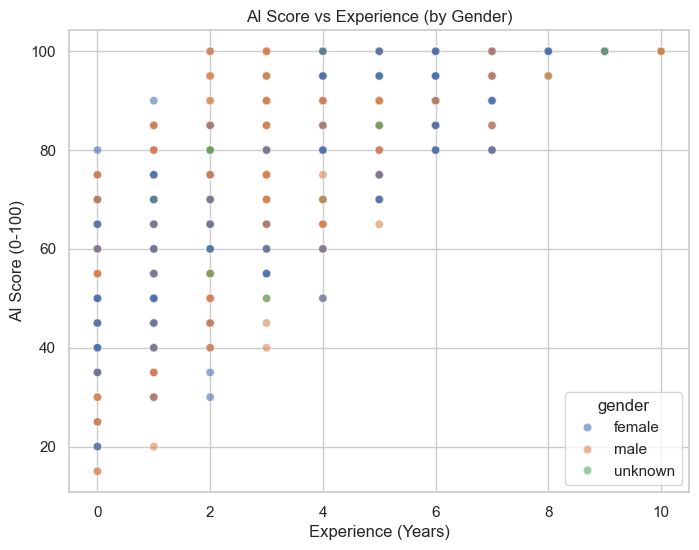

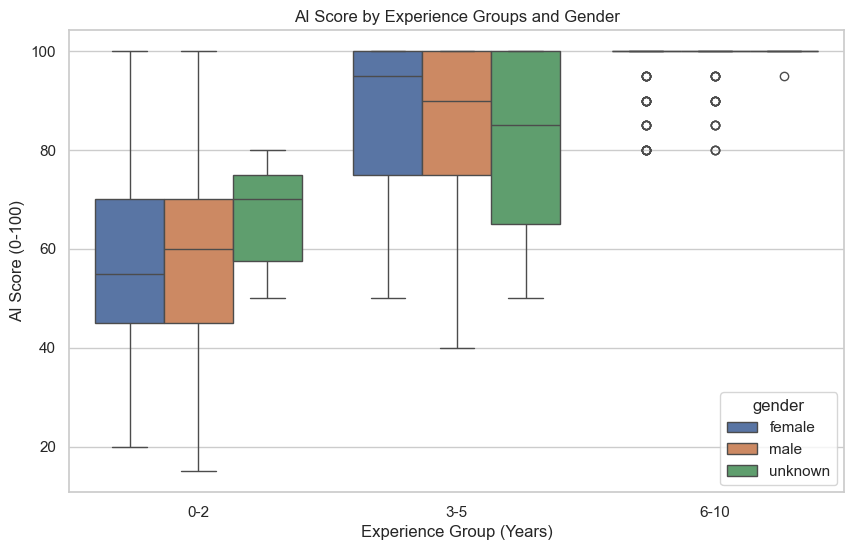

C:\Users\Mohadeseh Yousofy\AppData\Local\Temp\ipykernel_27124\525739857.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["experience_bin","gender"])["Hire_binary"]


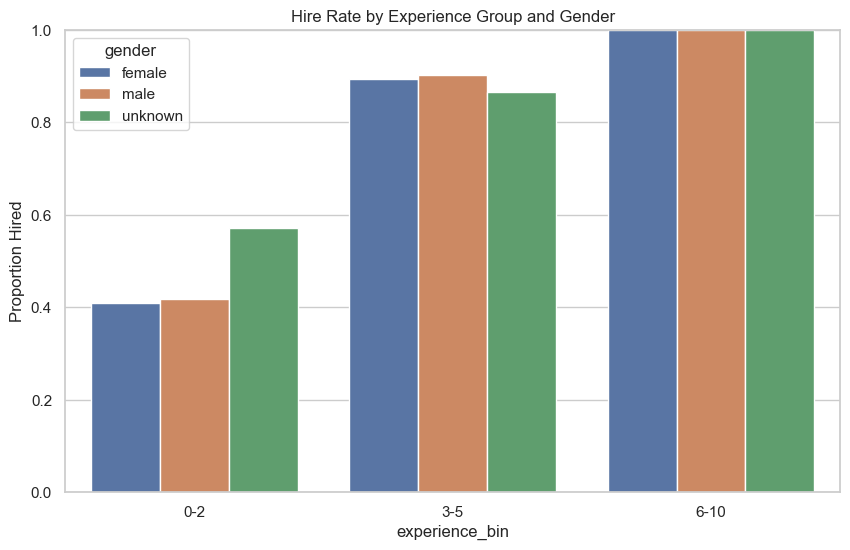


Summary by experience group & gender:
  experience_bin   gender  mean_ai_score  hire_rate  count
0            0-2   female          56.85       0.41    127
1            0-2     male          58.13       0.42    139
2            0-2  unknown          66.43       0.57      7
3            3-5   female          87.03       0.89    123
4            3-5     male          85.59       0.90    143
5            3-5  unknown          82.00       0.87     15
6           6-10   female          98.37       1.00    224
7           6-10     male          98.92       1.00    204
8           6-10  unknown          99.72       1.00     18


C:\Users\Mohadeseh Yousofy\AppData\Local\Temp\ipykernel_27124\525739857.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["experience_bin","gender"])


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# 1) Scatterplot: Experience vs AI Score, farbig nach Gender
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Experience (Years)", 
    y="AI Score (0-100)", 
    hue="gender", 
    data=df, 
    alpha=0.6
)
plt.title("AI Score vs Experience (by Gender)")
plt.show()

# 2) Boxplot: AI Score nach Erfahrungsklassen und Gender
# Klassen bauen (0-2, 3-5, 6-10 Jahre)
bins = [0,2,5,10]
labels = ["0-2","3-5","6-10"]
df["experience_bin"] = pd.cut(df["Experience (Years)"], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,6))
sns.boxplot(
    x="experience_bin", 
    y="AI Score (0-100)", 
    hue="gender", 
    data=df
)
plt.title("AI Score by Experience Groups and Gender")
plt.xlabel("Experience Group (Years)")
plt.show()

# 3) Hire rate nach Experience und Gender
hire_rate = (
    df.groupby(["experience_bin","gender"])["Hire_binary"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    x="experience_bin", y="Hire_binary", hue="gender", data=hire_rate
)
plt.title("Hire Rate by Experience Group and Gender")
plt.ylabel("Proportion Hired")
plt.ylim(0,1)
plt.show()

# 4) Zusammenfassung als Tabelle
summary = (
    df.groupby(["experience_bin","gender"])
      .agg(mean_ai_score=("AI Score (0-100)","mean"),
           hire_rate=("Hire_binary","mean"),
           count=("Hire_binary","size"))
      .reset_index()
)

print("\nSummary by experience group & gender:")
print(summary.round(2))


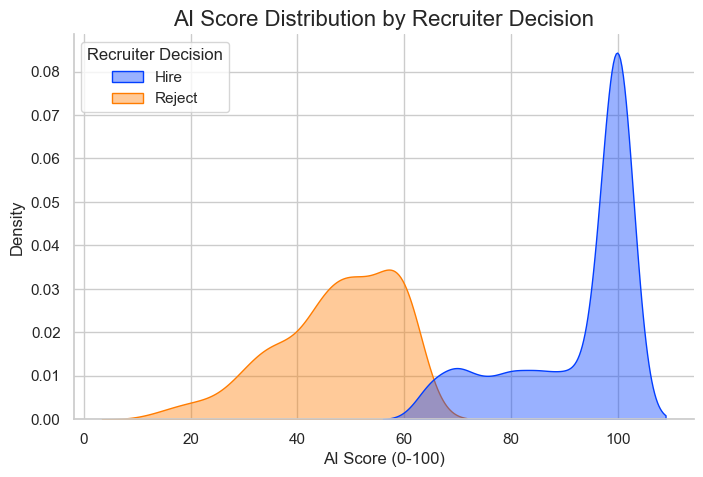

In [20]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='AI Score (0-100)', hue='Recruiter Decision', fill=True, common_norm=False, palette='bright', alpha=0.4)
plt.title('AI Score Distribution by Recruiter Decision', fontsize=16)
plt.xlabel('AI Score (0-100)')
plt.ylabel('Density')
sns.despine()
plt.show()